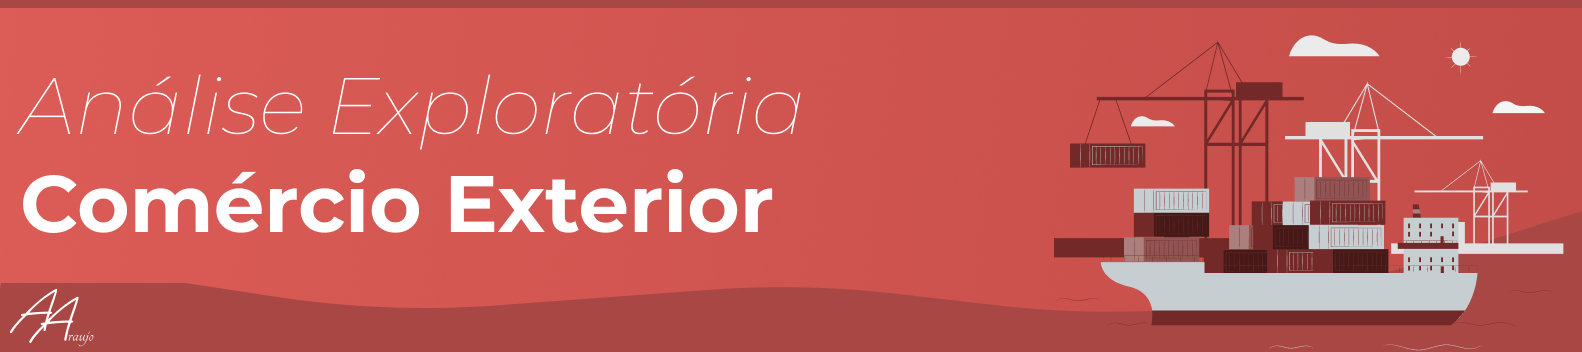

# Exploração de dados Comércio Exterior

<span style="font-size: 14px;">A área de comércio exterior de uma empresa automotiva, busca melhorar o monitoramento dos embarques de importação, implementando uma torre de controle eficiente. A empresa enfrenta desafios críticos, como paralisações na linha de produção devido a atrasos nas entregas, e precisa de uma visão completa das operações logísticas para tomar decisões mais inteligentes, encontrar oportunidades de melhoria e garantir o cumprimento dos prazos, minimizando o impacto em toda a cadeia de suprimentos.</span>

<span style="color: var(--vscode-foreground);">O objetivo desta análise exploratória é responder as perguntas de negócios para posteriomente servir como base para o painel de visualização (Dashboard).</span>

1. <span style="color: var(--vscode-foreground);"><b>Monitoramento de Operações:</b> Acompanhar as operações de importação, separadas por modal aéreo e marítimo;</span>
2. **Indicadores de Entrega:** Avaliar o desempenho de entrega no prazo(On Time Delivery, também conhecido como OTD) para cada modal, comparando com metas pré-estabelecidas;
3. **Desempenho de Operadores:** Avaliar a performance de cada operador logístico (companhias de transporte) envolvidos nas entregas;
4. **Exceções:** Identificar e categorizar desvios e exceções (tipos de problemas) no processo logístico que afetam a entrega pontual;
5. **Quantidade de Embarque:** Número total de embarques realizados, separados por modal;
6. **OTD(_On Time Delivery_):** Percentual de entregas realizadas dentro do prazo para cada modal, comparado com a meta estabelecida;
7. **Ranking de Exceções:** Classificação dos principais tipos de exceções que causam desvio nas operações, como atrasos do fornecedor, avarias, problemas de documentação, etc;
8. **Desempenho por Operador:** Performance dos operadores logísticos(companhias de transporte), considerando a porcentagem de OTD e total de embarques;
9. **Tendência Mensal OTD:** Visualização de tendência mensal para identificar padrões de entregas ao longo do tempo.

<span style="font-size: 14px;"><strong>Créditos da base de dados:</strong> Dados sintéticos disponibilizados no Power Bi Discovery (Karine Lago e Letícia S.)</span>

In [3]:
USE logisticadb;

SELECT TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE';

(3 rows affected)

Total execution time: 00:00:00.024

TABLE_NAME historico_import operador desvio

Relacionamento das tabelas:

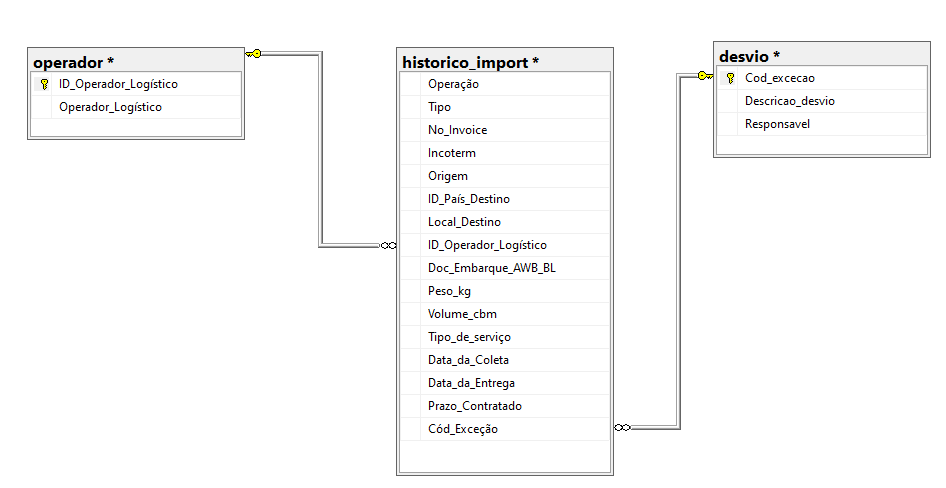

In [10]:
-- Taxa de embarque por modal aéreo e marítimo
SELECT
   Tipo,
   COUNT(*) AS 'Quantidade_embarque',
   FORMAT(1.0 * COUNT(*)/SUM(COUNT(*))OVER(),'0.00%') AS 'Percentual'
FROM logisticadb.dbo.historico_import
GROUP BY Tipo

(2 rows affected)

Total execution time: 00:00:00.309

Tipo Quantidade_embarque Percentual Aéreo 3530 85,89% Marítimo 580 14,11%

In [25]:
-- Criando uma coluna de prazo realiado para cálculo do OTD
CREATE OR ALTER VIEW Resumo 
AS(
SELECT
    *,
    DATEDIFF(DAY,Data_da_Coleta,Data_da_Entrega) AS 'Prazo_Realizado',
    IIF(DATEDIFF(DAY,Data_da_Coleta,Data_da_Entrega) <= Prazo_Contratado,'Dentro do prazo','Atraso') AS 'Status_entrega'
FROM logisticadb.dbo.historico_import
)

Commands completed successfully.

Total execution time: 00:00:00.010

In [38]:
-- Cálculo do OTD
WITH x AS(
SELECT
    Tipo,
    COUNT(*) AS 'Qtd_embarque',
    SUM(IIF(Status_entrega = 'Dentro do prazo',1,0)) AS 'Dentro do Prazo',
    SUM(IIF(Status_entrega = 'Atraso',1,0)) AS 'Atraso'
FROM Resumo
GROUP BY Tipo
)
SELECT 
    Tipo,
    Qtd_embarque,
    [Dentro do Prazo],
    FORMAT(1.0 * [Dentro do Prazo]/[Qtd_embarque],'0.00%') AS '%On Time',
    Atraso,
    FORMAT(1.0 * Atraso/[Qtd_embarque],'0.00%') AS '%Atraso'
FROM x

(2 rows affected)

Total execution time: 00:00:00.028

Tipo Qtd_embarque Dentro do Prazo %On Time Atraso %Atraso Aéreo 3530 2905 82,29% 625 17,71% Marítimo 580 416 71,72% 164 28,28%

In [27]:
SELECT * FROM logisticadb.dbo.historico_import

(4110 rows affected)

Total execution time: 00:00:00.082

Operação Tipo No_Invoice Incoterm Origem ID_País_Destino Local_Destino ID_Operador_Logístico Doc_Embarque_AWB_BL Peso_kg Volume_cbm Tipo_de_serviço Data_da_Coleta Data_da_Entrega Prazo_Contratado Cód_Exceção Importação Marítimo 989690 EXW DE-Germany BR Santos 4089 0010-9249-802.232 2910 2952 STANDARD 2023-12-29 2024-01-29 31 NULL Importação Marítimo 989693 EXW DE-Germany BR Santos 4089 0010-9249-802.235 1860 2952 STANDARD 2023-10-07 2023-11-05 29 NULL Importação Marítimo 989694 EXW DE-Germany BR Santos 4089 0010-9249-802.236 1210 984 STANDARD 2023-09-29 2023-10-28 29 NULL Importação Marítimo 989695 EXW IT-Italy BR Santos 4089 0010-9249-802.237 1940 1968 STANDARD 2023-07-01 2023-07-30 29 NULL Importação Marítimo 989696 EXW IT-Italy BR Santos 4089 0010-9249-802.238 1220 2952 STANDARD 2023-09-30 2023-11-01 25 NULL Importação Marítimo 989697 EXW IT-Italy BR Santos 4089 0010-9249-802.239 3670 2952 STANDARD 2023-04-25 2023-05-24 25 NULL Importação Marítimo 989698 EXW IT-Italy BR Santos 4089 0010-9249-802.240 6230 2952 STANDARD 2023-07-02 2023-07-31 29 NULL Importação Marítimo 989699 EXW DE-Germany BR Santos 4089 0010-9249-802.241 3440 2952 STANDARD 2023-12-05 2024-01-03 29 NULL Importação Marítimo 989700 EXW DE-Germany BR Santos 4089 0010-9249-802.242 4120 2952 STANDARD 2023-12-05 2024-01-12 29 NULL Importação Marítimo 989701 EXW IE-Ireland BR Santos 4089 0010-9249-802.243 3740 2952 STANDARD 2023-06-11 2023-07-18 29 NULL Importação Marítimo 989702 EXW IE-Ireland BR Santos 4089 0010-9249-802.244 2860 2952 STANDARD 2023-03-24 2023-04-22 29 NULL Importação Marítimo 989703 EXW DE-Germany BR Santos 4089 0010-9249-802.245 5040 1968 STANDARD 2023-08-11 2023-09-09 29 NULL Importação Marítimo 989704 EXW DE-Germany BR Santos 4089 0010-9249-802.246 2810 2952 STANDARD 2023-09-19 2023-10-18 29 NULL Importação Marítimo 989705 EXW DE-Germany BR Santos 4089 0010-9249-802.247 3480 2952 STANDARD 2023-03-11 2023-04-09 29 NULL Importação Marítimo 989706 EXW PT-Portugal BR Santos 4089 0010-9249-802.248 1840 2952 STANDARD 2023-11-29 2023-12-28 29 5,00 Importação Marítimo 989707 EXW PT-Portugal BR Santos 4089 0010-9249-802.249 4720 2952 STANDARD 2023-12-02 2023-12-31 29 NULL Importação Marítimo 989708 EXW PT-Portugal BR Santos 4089 0010-9249-802.250 4970 2952 STANDARD 2023-02-24 2023-03-25 29 NULL Importação Marítimo 989709 EXW PT-Portugal BR Santos 4089 0010-9249-802.251 4160 2952 STANDARD 2023-11-02 2023-12-01 29 NULL Importação Marítimo 989710 EXW PT-Portugal BR Santos 4089 0010-9249-802.252 2190 1968 STANDARD 2023-06-22 2023-07-21 29 NULL Importação Marítimo 989711 EXW PT-Portugal BR Santos 4089 0010-9249-802.253 2720 2952 STANDARD 2023-03-05 2023-04-03 29 NULL Importação Marítimo 989712 EXW PT-Portugal BR Santos 4089 0010-9249-802.254 1090 2952 STANDARD 2023-01-02 2023-01-31 29 NULL Importação Marítimo 989713 EXW PT-Portugal BR Santos 4089 0010-9249-802.255 3870 2952 STANDARD 2023-12-14 2024-01-12 29 NULL Importação Marítimo 989714 EXW DE-Germany BR Santos 4089 0010-9249-802.256 5240 2952 STANDARD 2023-02-14 2023-03-15 29 NULL Importação Marítimo 989715 EXW DE-Germany BR Santos 4089 0010-9249-802.257 3240 1968 STANDARD 2023-04-07 2023-05-06 29 NULL Importação Marítimo 989716 EXW DE-Germany BR Santos 4089 0010-9249-802.258 3230 2952 STANDARD 2023-02-04 2023-03-05 29 NULL Importação Marítimo 989717 EXW DE-Germany BR Santos 4089 0010-9249-802.259 5450 1968 STANDARD 2023-02-09 2023-03-10 29 NULL Importação Marítimo 989718 EXW DE-Germany BR Santos 4089 0010-9249-802.260 6220 2952 STANDARD 2023-10-10 2023-11-08 29 NULL Importação Marítimo 989719 EXW DE-Germany BR Santos 4089 0010-9249-802.261 3290 2952 STANDARD 2023-01-19 2023-02-24 29 NULL Importação Marítimo 989720 EXW IE-Ireland BR Santos 4089 0010-9249-802.262 1220 2952 STANDARD 2023-04-02 2023-05-05 29 NULL Importação Marítimo 989721 EXW IE-Ireland BR Santos 4089 0010-9249-802.263 4980 2952 STANDARD 2023-02-26 2023-03-27 29 NULL Importação Marítimo 989722 EXW DE-Germany BR Santos 4089 0010-9249-802.26